In [1]:
%matplotlib inline

import sys
sys.path.append("/home/caner/code/hawkes_bound")

import numpy as np
# from fasthawkes.em import hawkes_em, hawkes_perplexity
from fasthawkes.model.mv_exp import MultivariateExpHawkesProcess
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
!head -n15 example_data.csv

21,30
21,45
15,56
13,56
21,57
9,59
13,67
15,67
9,70
13,79
21,82
10,87
13,91
21,95
9,95


In [3]:
df = pd.read_csv("example_data.csv", header=None)
c, t = map(np.array, (df.iloc[:,0], df.iloc[:,1]))

In [10]:
proc = MultivariateExpHawkesProcess()
res = proc.fit(t.astype(np.float64), c)

(528,)
[  4.19004883e-04   4.08537383e-04   2.91972114e-04   2.94411144e-04
   2.06809347e-04   2.03760560e-04   3.79777164e-04   3.80895052e-04
   9.71546611e-04   9.39331101e-04   3.95834106e-04   4.15651218e-04
   8.22664207e-04   8.52643940e-04   3.01524979e-04   3.01728231e-04
   2.72663134e-04   2.53252527e-04   2.03658934e-04   1.86890609e-04
   8.46647993e-04   8.13314595e-04   1.07917833e-04   2.91055224e-01
   8.04632517e-01   7.21632470e-01   2.72594157e-01   5.23873641e-01
   8.31512240e-01   6.25764635e-01   5.38942516e-02   9.33073596e-01
   1.69505496e-01   2.50162621e-01   3.77991051e-01   5.66445538e-01
   8.05309381e-01   6.28070536e-01   4.35150516e-01   3.84000163e-01
   2.61803098e-01   8.88355687e-01   6.21951822e-01   7.17460790e-01
   6.88709826e-02   5.50085483e-02   8.48974092e-03   2.58090635e-02
   8.77948094e-02   5.74770755e-02   3.90123723e-02   6.01293345e-02
   4.74011269e-02   2.66527270e-02   5.52588396e-02   8.33990189e-02
   7.23006988e-02   4.50548

In [5]:
A, b, l = proc.get_params()

In [6]:
t_0 = t[c == 0]
len(t_0) / float(t_0[-1])

0.0005028058591333836

In [7]:
res

      fun: 780011.137834798
 hess_inv: <528x528 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 14131.79034991,  10508.24798636, -22434.83043179, -10603.61923753,
       -92968.80490836,  47298.93145549, -16723.80910275, -19137.20585032,
         8967.07064255,   5576.42470369,  -3031.84682266, -37836.98881426,
        29492.68613112,  33818.36206781,   -893.1338216 ,  -5118.78263855,
       -49856.07543186,  -8320.96697081,   4212.3930428 ,  -9248.43107702,
        13873.042961  ,  17370.97938154,   1007.40883552,    944.51545073,
          608.17323187,   1367.65501615,   1049.3220275 ,    639.30440064,
          869.25351371,    456.51911015,   1206.06969025,   1964.70307664,
         1032.20290316,   1291.28030867,   1970.91354113,   1697.39195598,
         1096.9243845 ,   1499.21693657,    778.54421045,    912.11871001,
          247.95182926,    517.94560261,   2376.18874335,   1877.96326305,
        -4818.5046077 ,  -4569.46787849,  -5360.46966964,  -3990.16159743,
 

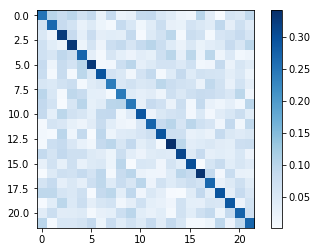

In [8]:
plt.imshow(A, cmap="Blues")
plt.colorbar()

In [9]:
np.linalg.norm(A, ord=2)

1.3851985663603776